In [1]:
import sys
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import randint, uniform

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error , mean_absolute_error

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("C://Users//chuen//Music//Project//0.csv//bangkok-air-quality.csv" , parse_dates=['date'], skipinitialspace=True)

data

,date,pm25,pm10,o3,no2,so2,co
0,2021-03-01,93.0,30.0,8.0,6.0,1.0,NaN
1,2021-03-02,68.0,27.0,7.0,5.0,1.0,NaN
2,2021-03-03,58.0,37.0,13.0,9.0,1.0,NaN
3,2021-03-04,74.0,35.0,13.0,6.0,NaN,NaN
4,2021-03-05,72.0,38.0,15.0,6.0,1.0,NaN
...,...,...,...,...,...,...,...
2619,2015-03-15,NaN,NaN,23.0,13.0,3.0,9.0
2620,2014-11-30,NaN,NaN,40.0,36.0,4.0,11.0
2621,2013-12-31,NaN,NaN,68.0,33.0,3.0,7.0
2622,2014-01-26,NaN,NaN,54.0,53.0,6.0,18.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2624 entries, 0 to 2623
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2624 non-null   datetime64[ns]
 1   pm25    1680 non-null   float64       
 2   pm10    2609 non-null   float64       
 3   o3      2610 non-null   float64       
 4   no2     2611 non-null   float64       
 5   so2     1877 non-null   float64       
 6   co      963 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 143.6 KB


In [5]:
#เรียงเวลา
data=data.sort_values('date').reset_index(drop=True).copy()
data

,date,pm25,pm10,o3,no2,so2,co
0,2013-12-31,NaN,NaN,68.0,33.0,3.0,7.0
1,2014-01-01,NaN,84.0,90.0,48.0,5.0,16.0
2,2014-01-02,NaN,84.0,119.0,63.0,7.0,14.0
3,2014-01-03,NaN,103.0,95.0,57.0,7.0,13.0
4,2014-01-04,NaN,101.0,52.0,34.0,1.0,NaN
...,...,...,...,...,...,...,...
2619,2021-03-10,98.0,53.0,16.0,12.0,1.0,NaN
2620,2021-03-11,111.0,52.0,19.0,10.0,NaN,NaN
2621,2021-03-12,101.0,48.0,15.0,7.0,1.0,NaN
2622,2021-03-13,96.0,32.0,9.0,4.0,1.0,NaN


In [6]:
y_col='pm25'

In [7]:
data.dropna(subset=[y_col], inplace=True)
data=data.reset_index(drop=True)
data

,date,pm25,pm10,o3,no2,so2,co
0,2016-07-30,61.0,19.0,17.0,15.0,8.0,6.0
1,2016-07-31,68.0,24.0,25.0,13.0,7.0,6.0
2,2016-08-01,60.0,20.0,26.0,14.0,2.0,6.0
3,2016-08-02,68.0,25.0,21.0,14.0,7.0,6.0
4,2016-08-03,70.0,26.0,23.0,16.0,2.0,6.0
...,...,...,...,...,...,...,...
1675,2021-03-10,98.0,53.0,16.0,12.0,1.0,NaN
1676,2021-03-11,111.0,52.0,19.0,10.0,NaN,NaN
1677,2021-03-12,101.0,48.0,15.0,7.0,1.0,NaN
1678,2021-03-13,96.0,32.0,9.0,4.0,1.0,NaN


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1680 non-null   datetime64[ns]
 1   pm25    1680 non-null   float64       
 2   pm10    1672 non-null   float64       
 3   o3      1672 non-null   float64       
 4   no2     1672 non-null   float64       
 5   so2     943 non-null    float64       
 6   co      31 non-null     float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 92.0 KB


In [9]:
def date_parts(data, date_colname='date'):
    '''create year, month, day, dayname columns'''
    data['year']=data['date'].dt.year
    data['month']=data['date'].dt.month
    data['day']=data['date'].dt.day
    data['day_name']=data['date'].dt.day_name().astype('category')

In [10]:
date_parts(data)

In [11]:
data

,date,pm25,pm10,o3,no2,so2,co,year,month,day,day_name
0,2016-07-30,61.0,19.0,17.0,15.0,8.0,6.0,2016,7,30,Saturday
1,2016-07-31,68.0,24.0,25.0,13.0,7.0,6.0,2016,7,31,Sunday
2,2016-08-01,60.0,20.0,26.0,14.0,2.0,6.0,2016,8,1,Monday
3,2016-08-02,68.0,25.0,21.0,14.0,7.0,6.0,2016,8,2,Tuesday
4,2016-08-03,70.0,26.0,23.0,16.0,2.0,6.0,2016,8,3,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...
1675,2021-03-10,98.0,53.0,16.0,12.0,1.0,NaN,2021,3,10,Wednesday
1676,2021-03-11,111.0,52.0,19.0,10.0,NaN,NaN,2021,3,11,Thursday
1677,2021-03-12,101.0,48.0,15.0,7.0,1.0,NaN,2021,3,12,Friday
1678,2021-03-13,96.0,32.0,9.0,4.0,1.0,NaN,2021,3,13,Saturday


In [12]:
data.columns

Index(['date', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co', 'year', 'month',
       'day', 'day_name'],
      dtype='object')

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['day_name'] = le.fit_transform(data['day_name'])

print(dict(zip(le.classes_, le.transform(le.classes_))))

{'Friday': 0, 'Monday': 1, 'Saturday': 2, 'Sunday': 3, 'Thursday': 4, 'Tuesday': 5, 'Wednesday': 6}


In [14]:
df=data[['date', 'year', 'month', 'day', 'day_name', y_col]]
df

,date,year,month,day,day_name,pm25
0,2016-07-30,2016,7,30,2,61.0
1,2016-07-31,2016,7,31,3,68.0
2,2016-08-01,2016,8,1,1,60.0
3,2016-08-02,2016,8,2,5,68.0
4,2016-08-03,2016,8,3,6,70.0
...,...,...,...,...,...,...
1675,2021-03-10,2021,3,10,6,98.0
1676,2021-03-11,2021,3,11,4,111.0
1677,2021-03-12,2021,3,12,0,101.0
1678,2021-03-13,2021,3,13,2,96.0


In [15]:
df=df.set_index('date')
df

,year,month,day,day_name,pm25
date,,,,,
2016-07-30,2016,7,30,2,61.0
2016-07-31,2016,7,31,3,68.0
2016-08-01,2016,8,1,1,60.0
2016-08-02,2016,8,2,5,68.0
2016-08-03,2016,8,3,6,70.0
...,...,...,...,...,...
2021-03-10,2021,3,10,6,98.0
2021-03-11,2021,3,11,4,111.0
2021-03-12,2021,3,12,0,101.0


## visualize data

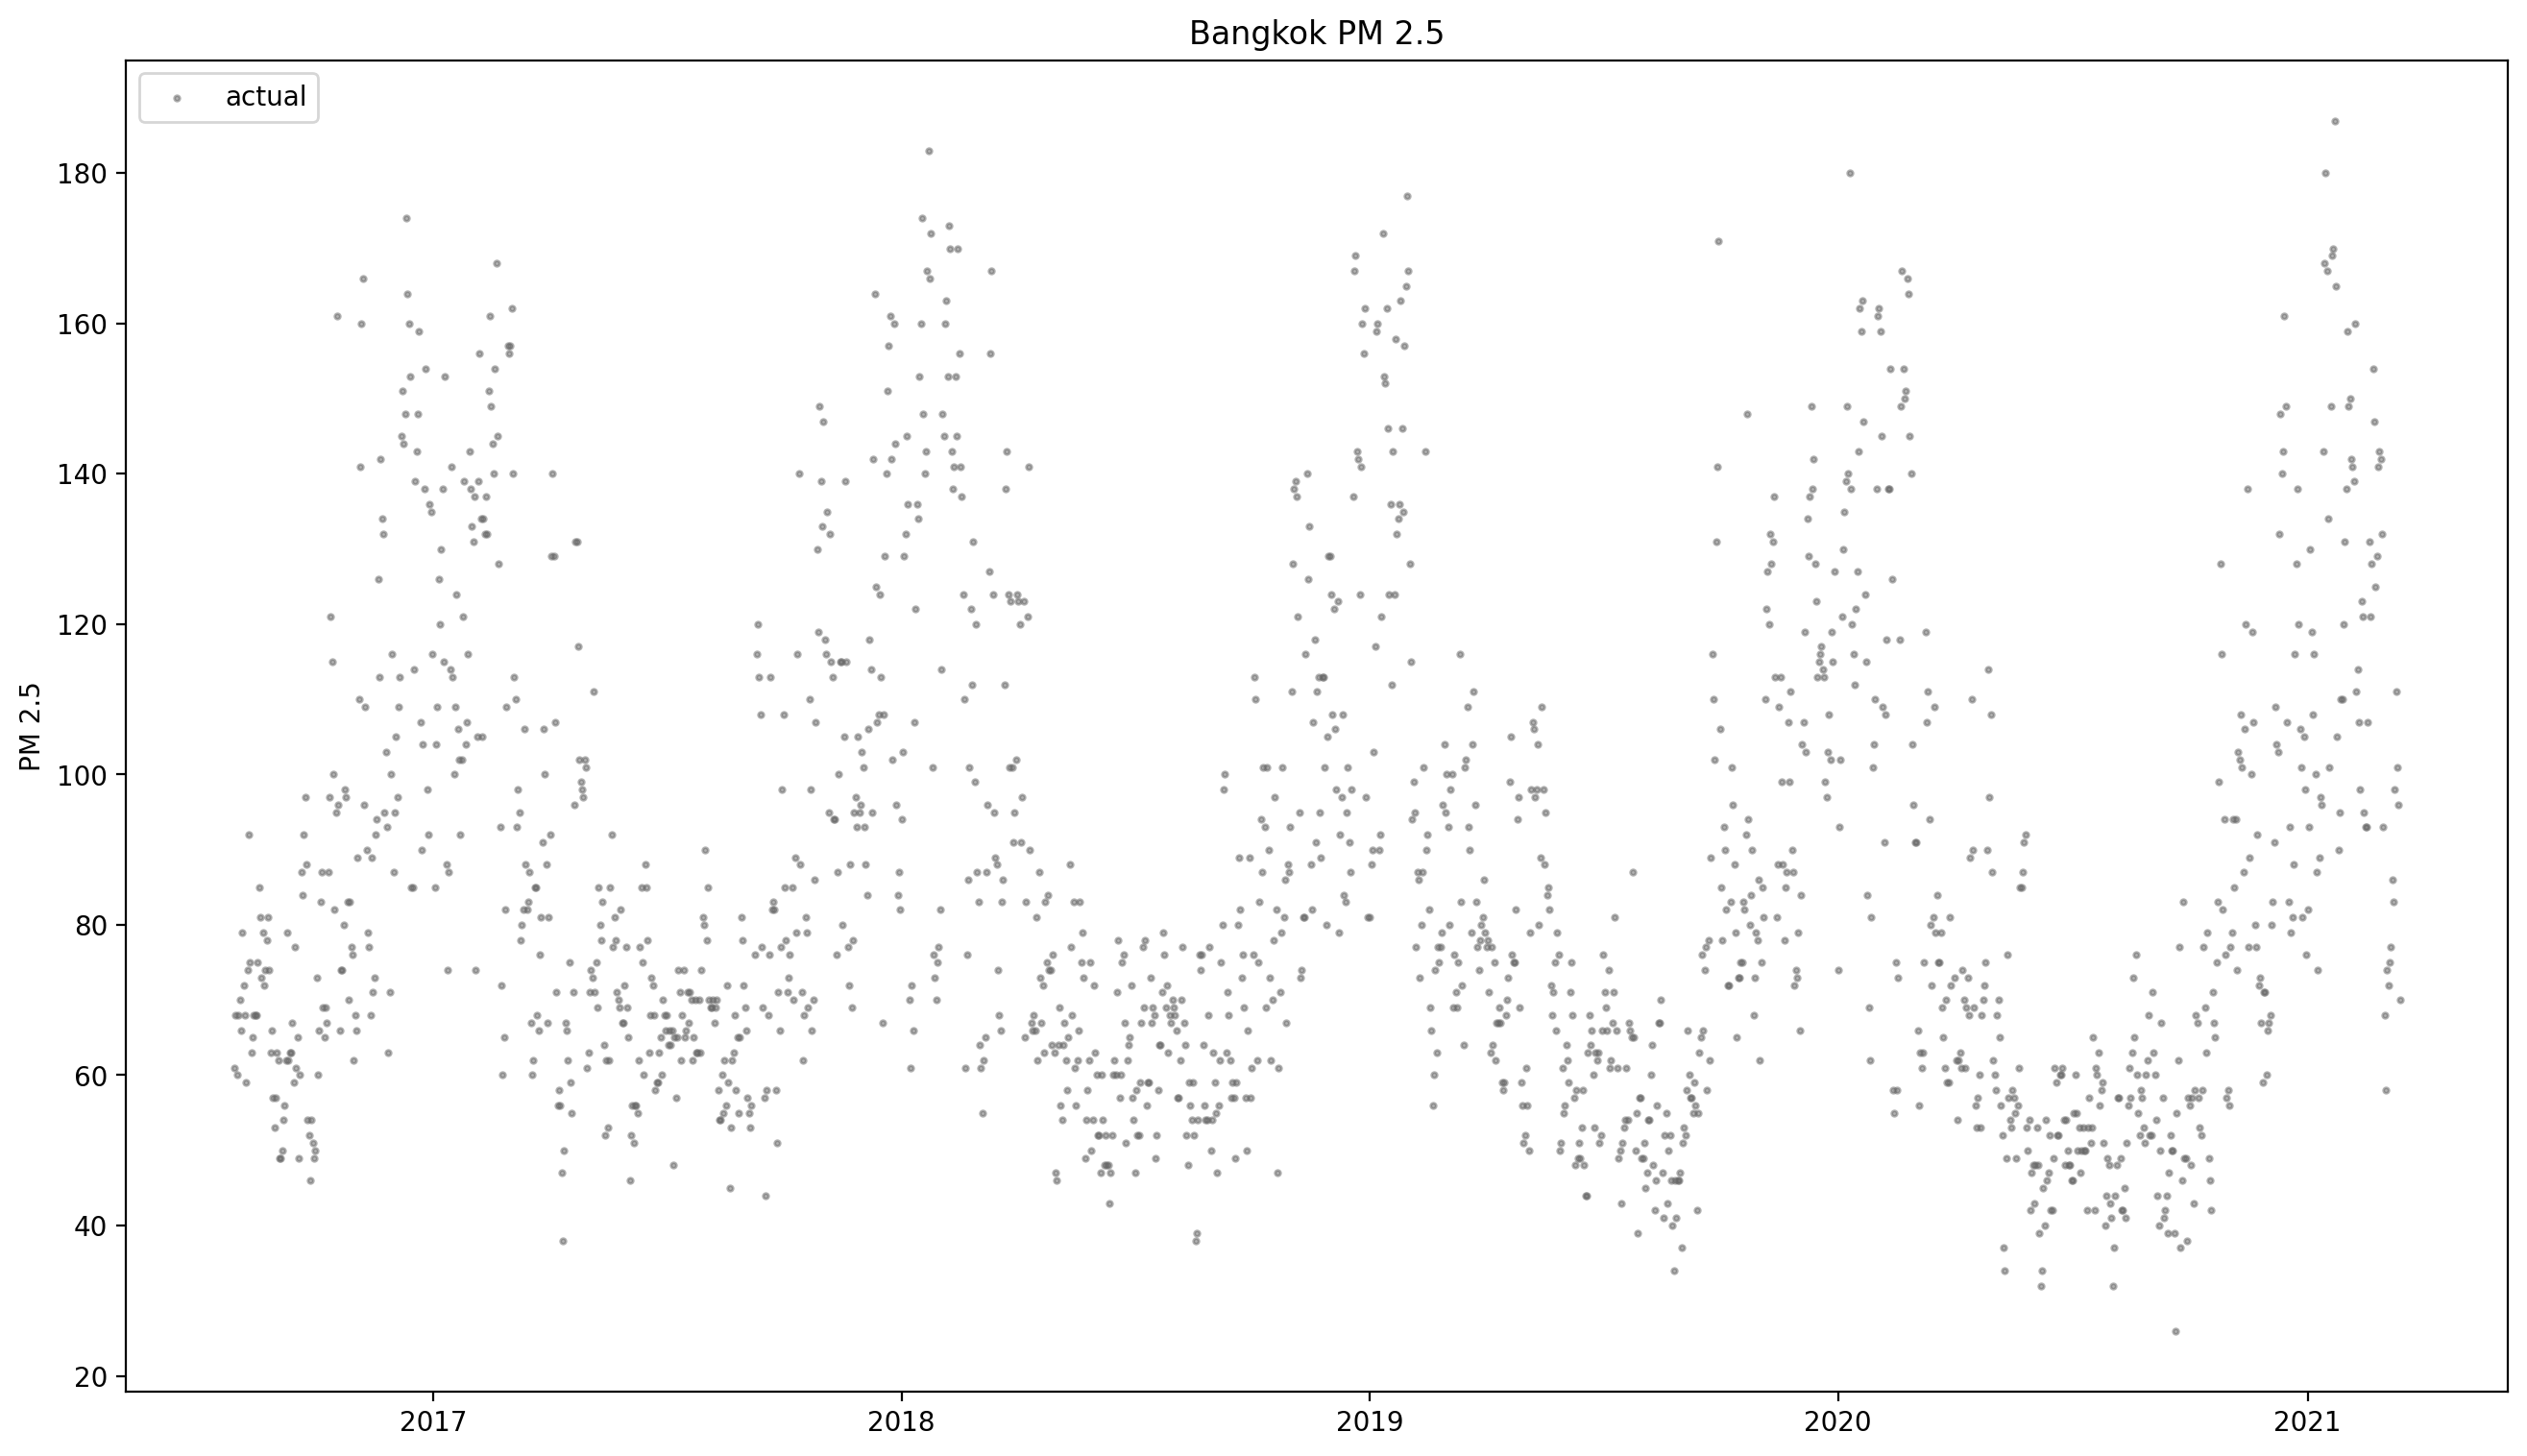

In [16]:
plt.figure(figsize=(16, 9))
plt.scatter(df.index, df[y_col], alpha=.5, s=4, label='actual', color='.4')
plt.ylabel('PM 2.5')
plt.title('Bangkok PM 2.5')
plt.legend();

## Lightgbm

In [17]:
feature_cols=[
    'year', 'month', 
    'day', 
    'day_name'
]
X=df[feature_cols]
y=df[y_col]

In [18]:
split_at=1400
X_train, X_test, y_train, y_test=X[:split_at], X[split_at:], y[:split_at], y[split_at:]

In [19]:
import lightgbm as lgb
from lightgbm import LGBMRegressor
print(f'lightgbm version = {lgb.__version__}')

lightgbm version = 4.3.0


In [20]:
param_dist = {
    'num_leaves': [31, 50, 70, 90],          #จำนวนใบที่มากขึ้นสามารถทำให้โมเดลมีความสามารถในการเรียนรู้ที่ดีขึ้น
    'max_depth': [-1, 10, 20, 30],           # หมายถึงไม่มีการจำกัดความลึก. การจำกัดความลึกของต้นไม้สามารถช่วยลดการ overfitting 
    'learning_rate': [0.01, 0.05, 0.1, 0.2], 
    'n_estimators': [20, 40, 60, 80],        #จำนวนของต้นไม้
    'subsample': [0.6, 0.8, 1.0],            #จำนวนของต้นไม้ ที่จะใช้ในการสร้างโมเดล.
    'colsample_bytree': [0.6, 0.8, 1.0],     #ดส่วนของฟีเจอร์ที่ใช้สำหรับการสร้างแต่ละต้นไม้
    'reg_alpha': [0, 0.1, 0.5, 1.0],         # L1 regularization
    'reg_lambda': [0, 0.1, 0.5, 1.0]         # L2 regularization
}

In [21]:
lgb_reg = LGBMRegressor()

In [22]:
random_search = RandomizedSearchCV(
    estimator=lgb_reg,
    param_distributions=param_dist,
    n_iter=100,
    scoring='neg_mean_absolute_error',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

In [23]:
random_search.fit(X_train, y_train ,  eval_set=[(X_test, y_test)])

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000076 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 58
[LightGBM] [Info] Number of data points in the train set: 1400, number of used features: 4
[LightGBM] [Info] Start training from score 87.292143


RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [-1, 10, 20, 30],
                                        'n_estimators': [20, 40, 60, 80],
                                        'num_leaves': [31, 50, 70, 90],
                                        'reg_alpha': [0, 0.1, 0.5, 1.0],
                                        'reg_lambda': [0, 0.1, 0.5, 1.0],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=1)

In [24]:
random_search.best_params_

{'subsample': 1.0,
 'reg_lambda': 0.5,
 'reg_alpha': 0.1,
 'num_leaves': 31,
 'n_estimators': 20,
 'max_depth': -1,
 'learning_rate': 0.1,
 'colsample_bytree': 1.0}

In [25]:
-random_search.best_score_

18.693312929124552

In [26]:
dtrain = lgb.Dataset(X_train, label=y_train)
dtest = lgb.Dataset(X_test, label=y_test , reference=dtrain)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000380 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 58
[LightGBM] [Info] Number of data points in the train set: 1400, number of used features: 4
[LightGBM] [Info] Start training from score 87.292143


<Axes: title={'center': 'Metric during training'}, xlabel='Iterations', ylabel='l1'>

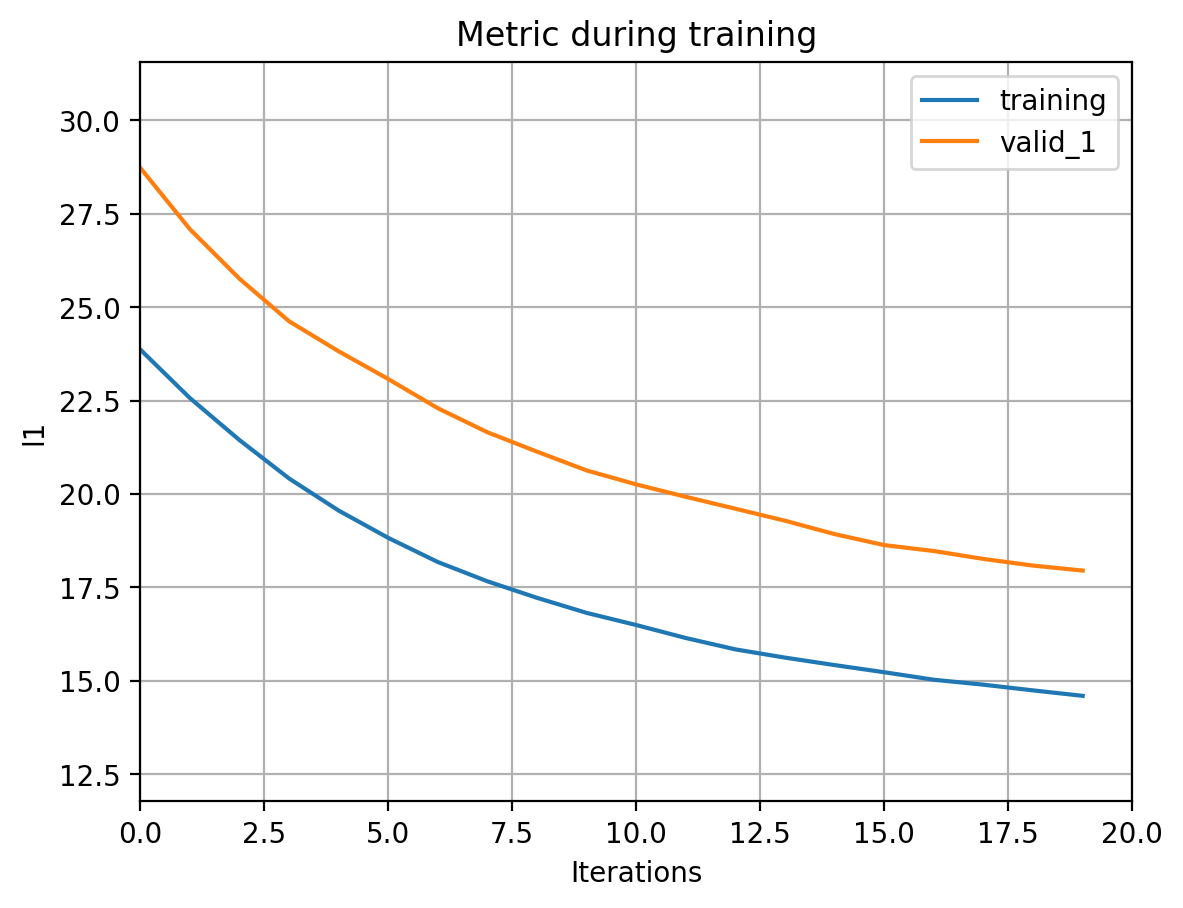

In [27]:
params = {
        'objective': 'regression',
        'metric': 'mae',
        'subsample': 1.0,
        'reg_lambda': 0.5,
        'reg_alpha': 0.1,
        'num_leaves': 31,
        'n_estimators': 20,
        'max_depth': -1,
        'learning_rate': 0.1,
        'colsample_bytree': 1.0   
}
evals={}
model = lgb.train(params=params, 
                train_set = dtrain, 
                valid_sets=[dtrain, dtest],
                callbacks = [lgb.record_evaluation(evals)])

lgb.plot_metric(evals)

In [28]:
#predict

In [29]:
pred = model.predict(X_test[:5])
pred

array([59.58849745, 59.58849745, 59.58849745, 59.58849745, 59.58849745])

In [30]:
model.predict([[2020, 6 ,8 ,1]])

array([59.58849745])

In [31]:
X_test[:5]

,year,month,day,day_name
date,,,,
2020-06-08,2020,6,8,1
2020-06-09,2020,6,9,5
2020-06-10,2020,6,10,6
2020-06-11,2020,6,11,4
2020-06-12,2020,6,12,0


In [32]:
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'Friday': 0, 'Monday': 1, 'Saturday': 2, 'Sunday': 3, 'Thursday': 4, 'Tuesday': 5, 'Wednesday': 6}


## visualize forecast

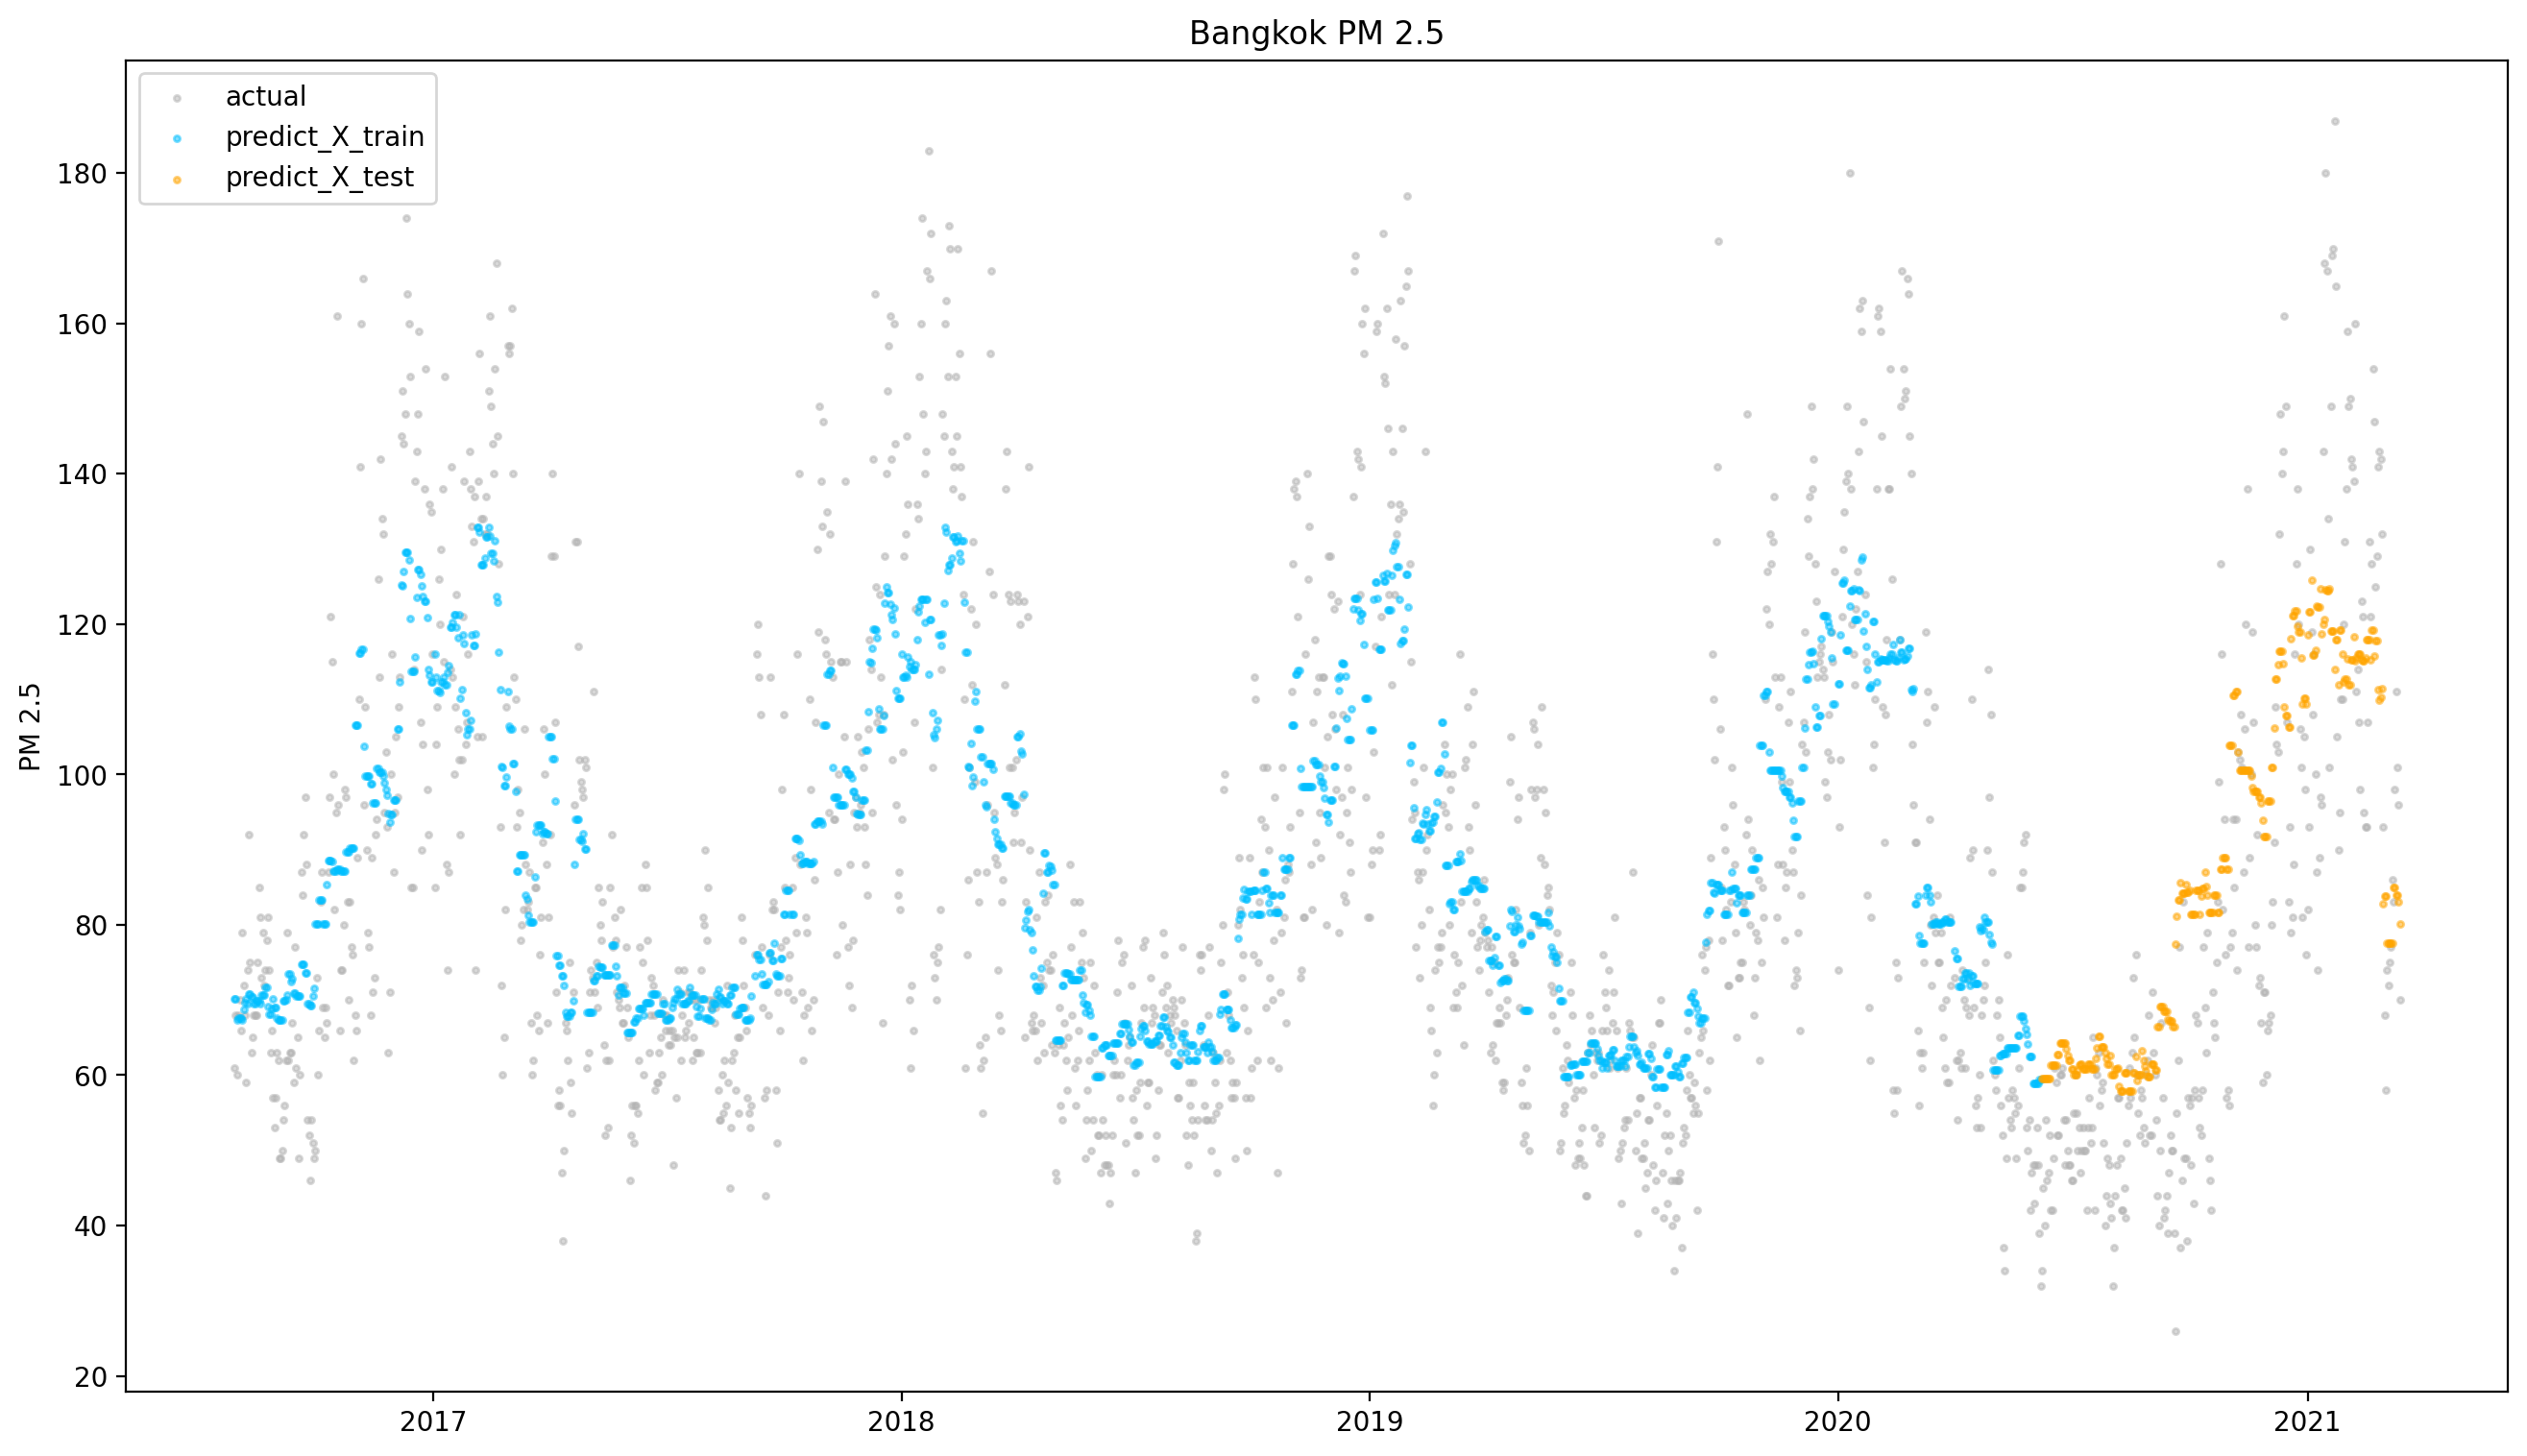

In [34]:
plt.figure(figsize=(16, 9))
plt.scatter(df.index, df[y_col], alpha=.5, s=5, label='actual', color='.7') #actual
plt.scatter(X_train.index, model.predict(X_train), alpha=.5, s=5, label='predict_X_train', color='deepskyblue')
plt.scatter(X_test.index, model.predict(X_test), alpha=.5, s=5, label='predict_X_test', color='orange')
plt.ylabel('PM 2.5')
plt.title('Bangkok PM 2.5')
plt.legend();